Author : Aditya Ingle
Organisation : The Sparks Foundation

To Predict the percentage of marks of an student based on the number of study hours.

First off Importing the libraries and Dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading dataset

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [61]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#To Visualize and Analyze the imported Dataset (Check null values)

In [62]:
print(df.shape)


(25, 2)


In [63]:
hours = df['Hours']
scores = df['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Count'>

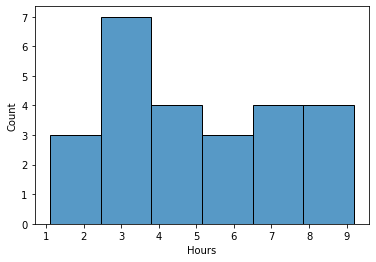

In [64]:
sns.histplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Count'>

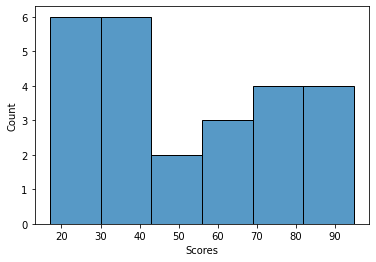

In [65]:
sns.histplot(scores)

In [66]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [67]:
#Here we establish that the two variables are strongly correlated

#Now To Split the Data for Testing and Training 

In [68]:
X = df[['Hours']]
Y = df['Scores']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [70]:
print(X_train)

    Hours
4     3.5
2     3.2
20    2.7
6     9.2
7     5.5
22    3.8
1     5.1
16    2.5
0     2.5
15    8.9
24    7.8
23    6.9
9     2.7
8     8.3
12    4.5
11    5.9
5     1.5


In [71]:
print(Y_train)

4     30
2     27
20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64


In [72]:
print(X_test)


    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8
10    7.7
18    6.1
19    7.4


In [73]:
print(Y_test)

14    17
13    42
17    24
3     75
21    54
10    85
18    67
19    69
Name: Scores, dtype: int64


Training the Data (Liner Regression)

In [74]:
from sklearn.linear_model import LinearRegression
dem = LinearRegression()
dem.fit(X_train, Y_train)

LinearRegression()

In [75]:
print(X_test)
y_pred = dem.predict(X_test) # Predicting the scores

    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8
10    7.7
18    6.1
19    7.4


In [76]:
#ForTrainingSet

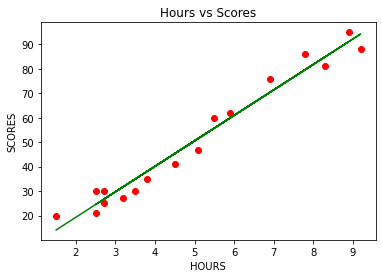

In [77]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, dem.predict(X_train), color = 'green')
plt.title('Hours vs Scores')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.show()

In [78]:
#ForTestSet

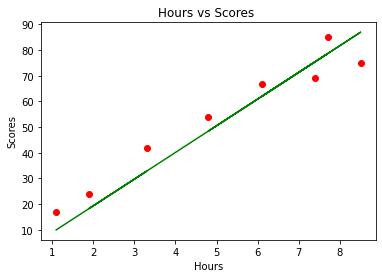

In [79]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, dem.predict(X_test), color = 'green')
plt.title('Hours vs Scores ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [80]:
hours=9.25
score_predict=dem.predict([[hours]])
print('If student studies for {} hours per day, he/she will score {} percentage in the exam.'.format(hours,score_predict))

If student studies for 9.25 hours per day, he/she will score [94.78722213] percentage in the exam.


#Evaluation of our Model

In [81]:
from sklearn import metrics
from sklearn.metrics import r2_score
Accuracy = r2_score(Y_test, y_pred)
print('Accuracy Score = ', Accuracy)
m = metrics.mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error = ', m)

Accuracy Score =  0.8933827573294114
Mean Absolute Error =  7.169048271425507
